### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---
#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---

Función de Transferencia del sistema base (lazo cerrado):
<TransferFunction>: sys[53]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10


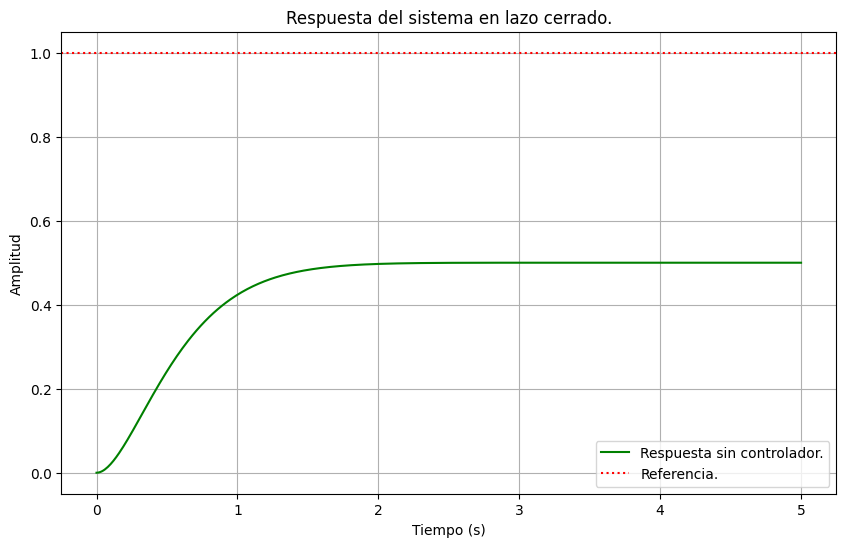

Métricas de desempeño del sistema base:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [11]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Definición de la planta Gp(s). ---
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)

# --- Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). ---
# Esto es Gc(s) = 1.
sistema_base = ct.feedback(Gp, 1)
print("Función de Transferencia del sistema base (lazo cerrado):")
print(sistema_base)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 5, 501)
t, y_base = ct.step_response(sistema_base, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.", color = 'green')
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Respuesta del sistema en lazo cerrado.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema base:")
info = ct.step_info(sistema_base)

# step_info devuelve un diccionario, podemos imprimir los valores clave.
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")

# El error en estado estacionario se verifica observando el valor final.
valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

Las raíces de s (polos) del sistema base son:
[-3.+1.j -3.-1.j]


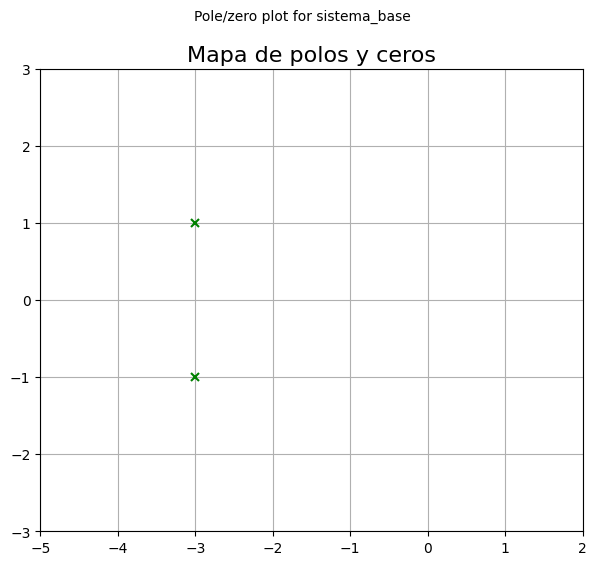

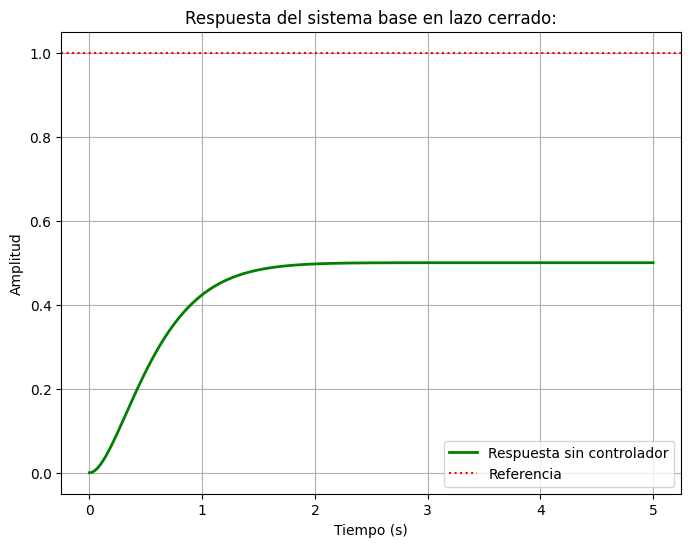

Métricas de desempeño del sistema con controlador Proporcional-Integral-Derivativo:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [12]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos_base = ct.poles(sistema_base)

t = np. linspace (0, 5, 501)
t_base, y_base = ct.step_response(sistema_base, T=t)




# Imprimimos el resultado.
print("Las raíces de s (polos) del sistema base son:")
print(polos_base)


# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
plt.xlim(-5, 2)      
plt.ylim(-3, 3)      
plt.xticks(np.arange(-5, 3, 1))
plt.yticks(np.arange(-3, 4, 1))
plt.title('Mapa de polos y ceros', fontsize=16)
ct.pzmap(sistema_base, label="sistema_base", color='green')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(t_base, y_base, label='Respuesta sin controlador', linewidth=2, color='green')
plt.axhline(y=1, color="r", linestyle=":", label="Referencia")
plt.title('Respuesta del sistema base en lazo cerrado:')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


print("Métricas de desempeño del sistema con controlador Proporcional-Integral-Derivativo:")
info = ct.step_info(sistema_base)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

### Razonamiento de sitonización de las ganancias kp, ki y kd.

$$K_p = 17, \quad K_i = 18, \quad K_d = 4$$


Durante la sintonización del controlador PID, se incrementó primero la ganancia proporcional $K_p$ para lograr una respuesta rápida, reduciendo el tiempo de subida pero generando sobreimpulso. Luego, se ajustó la ganancia derivativa $K_d$ para amortiguar las oscilaciones y suavizar la respuesta. Finalmente, se añadió la ganancia integral $K_i$ para eliminar el error en estado estacionario, cuidando que no reintrodujera sobreimpulso. Esta combinación permitió una respuesta veloz, estable y precisa.


Función de Transferencia del sistema de lazon cerrado con controlador Proporcional-Integral-Derivativo:
<TransferFunction>: sys[63]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     20 s^2 + 85 s + 90
  ------------------------
  s^3 + 26 s^2 + 90 s + 90
Las raíces de s (polos) del sistema controlado son:
[-22.114262+0.j          -1.942869+0.54316835j  -1.942869-0.54316835j]


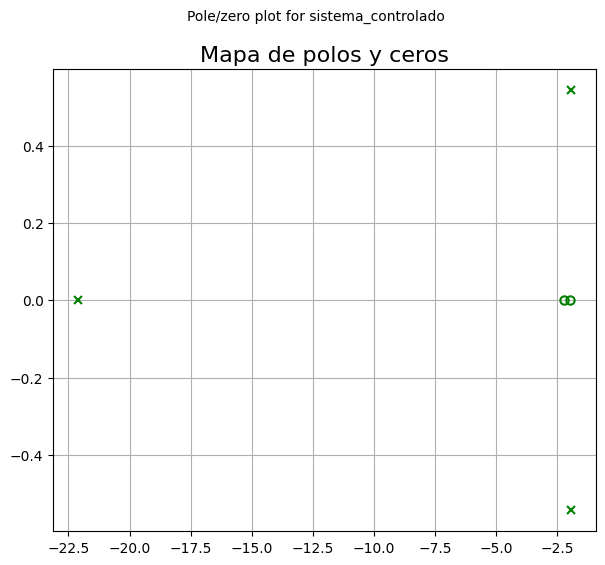

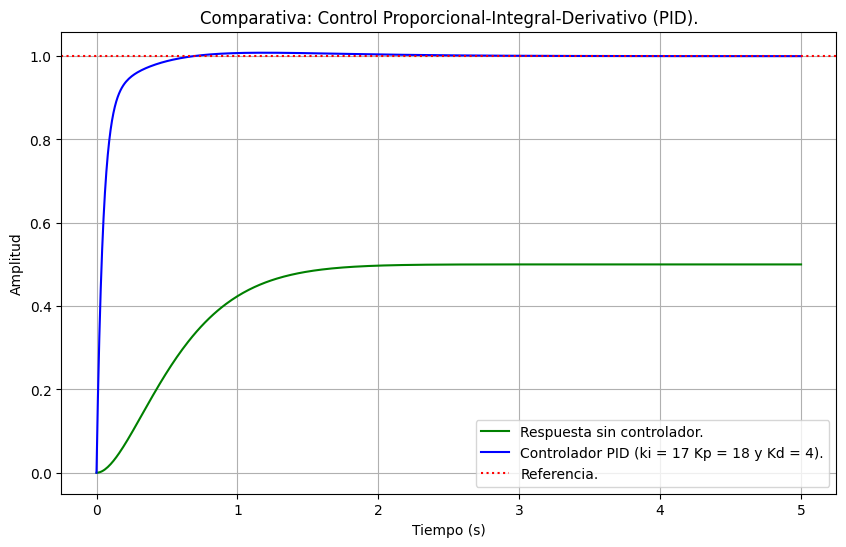

Métricas de desempeño del sistema con controlador Proporcional-Integral-Derivativo:
  - Sobreimpulso (Overshoot): 0.82%
  - Tiempo de establecimiento (SettlingTime): 0.42 s
  - Valor final: 1.0000
  - Error en estado estacionario (1 - valor_final): -0.0000


In [13]:
Kp = 17
Ki = 18
Kd = 4

# --- Creación del controlador PD. ---
# El numerador es [Kd, Kp].
Gc_base = ct.tf([Kd, Kp, Ki], [0,1,0])

# --- Sistema en lazo cerrado con controlador PD. ---
sistema_PID = ct.feedback(Gc_base * Gp, 1)
print("Función de Transferencia del sistema de lazon cerrado con controlador Proporcional-Integral-Derivativo:")
print(sistema_PID)

polos_PID = ct.poles(sistema_PID)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 5, 501)
t_PID, y_PID = ct.step_response(sistema_PID, T=t)

print("Las raíces de s (polos) del sistema controlado son:")
print(polos_PID)

plt.figure(figsize=(7, 6))
plt.title('Mapa de polos y ceros', fontsize=16)
ct.pzmap(sistema_PID, label="sistema_controlado", color='green')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.", color='green')
plt.plot(t_PID, y_PID, label=f"Controlador PID (ki = {Kp} Kp = {Ki} y Kd = {Kd}).", color='blue')
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")



plt.title("Comparativa: Control Proporcional-Integral-Derivativo (PID).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional-Integral-Derivativo:")
info = ct.step_info(sistema_PID)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PID[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")
